<h1>Task 1</h1>

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

@tf.function
def contrastive_loss(y_true, y_pred):
    # ...
    return 

# Build a simple CNN with strided convolution layers 
def define_model():
    inputs = tf.keras.Input(shape=(28,28,1),name='Inputs')
    x = layers.Conv2D(16,kernel_size=(5,5),activation='relu',padding='same',strides=1,name='L1')(inputs)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',strides=2,name='L2')(x)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L3')(x)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',strides=2,name='L4')(x)
    x = layers.Flatten()(x)
    embedding_layer = layers.Dense(2, activation='relu', name='Embedding')(x)
    outputs = layers.Dense(10,activation='softmax')(embedding_layer)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


def mnist_data():
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)
    x_train = x_train/255.0
    x_test = x_test/255.0
    return x_train, y_train, x_test, y_test


# Train the model on MNIST data using standard cross-entropy loss
def train_model(model, x_train, y_train, x_test, y_test, epochs=100):
    model.compile(optimizer='adam', loss=['categorical_crossentropy', 'mean_squared_error'], metrics=['accuracy'])
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=64)


x_train, y_train, x_test, y_test = mnist_data()
model = define_model()
train_model(model, x_train, y_train, x_test, y_test, 20)




Epoch 1/20
938/938 [==============================] - 11s 11ms/step - loss: 1.5153 - accuracy: 0.4342 - val_loss: 1.0730 - val_accuracy: 0.5841
Epoch 2/20
938/938 [==============================] - 10s 11ms/step - loss: 0.9894 - accuracy: 0.6128 - val_loss: 0.8748 - val_accuracy: 0.6397
Epoch 3/20
938/938 [==============================] - 10s 10ms/step - loss: 0.8123 - accuracy: 0.7004 - val_loss: 0.6751 - val_accuracy: 0.7732
Epoch 4/20
938/938 [==============================] - 10s 10ms/step - loss: 0.6431 - accuracy: 0.7936 - val_loss: 0.5802 - val_accuracy: 0.8065
Epoch 5/20
938/938 [==============================] - 10s 10ms/step - loss: 0.5552 - accuracy: 0.8138 - val_loss: 0.5394 - val_accuracy: 0.8160
Epoch 6/20
938/938 [==============================] - 10s 10ms/step - loss: 0.5019 - accuracy: 0.8242 - val_loss: 0.4668 - val_accuracy: 0.8330
Epoch 7/20
938/938 [==============================] - 10s 10ms/step - loss: 0.4648 - accuracy: 0.8326 - val_loss: 0.4486 - val_accuracy:

In [28]:
model_for_embeddings = tf.keras.Model(inputs=model.input,
                                            outputs=model.get_layer('Embedding').output)

32/32 [==============================] - 0s 5ms/step


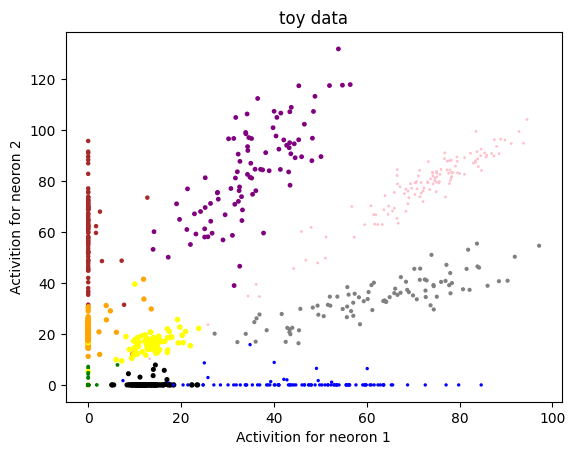

In [37]:
ins_indices = np.random.choice(x_train.shape[0], size=1000, replace=False)
ins = x_train[ins_indices]
labels = y_train[ins_indices].argmax(axis=1)
outs = model_for_embeddings.predict(ins)

colors = {
    0: 'red',
    1: 'pink',
    2: 'blue',
    3: 'green',
    4: 'grey',
    5: 'brown',
    6: 'purple',
    7: 'black',
    8: 'orange',
    9: 'yellow',
}

%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(outs[:,0], outs[:,1], labels, c=[colors[x] for x in labels])
ax.set_xlabel('Activition for neoron 1')
ax.set_ylabel('Activition for neoron 2')
ax.set_title('toy data')
plt.show()

<h1>Task 2</h1>

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt


batch_size = 8
alpha = 1
learning_rate = 0.0001

@tf.function
def contrastive_loss(y_true, y_pred):
    L = 0.0
    for i in range(batch_size):
        for j in range(i+1, batch_size):
            D = tf.square(y_pred[i] - y_pred[j])
            if y_true[i] == y_true[j]:
                L = L+D
            else:
                L = L+tf.maximum(0.0, alpha-D)
    return L


def mnist_data():
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)
    x_train = x_train/255.0
    x_test = x_test/255.0
    return x_train, y_train, x_test, y_test

# Build a simple CNN with strided convolution layers 
def define_model2():
    inputs = tf.keras.Input(shape=(28,28,1),name='Inputs')
    x = layers.Conv2D(16,kernel_size=(5,5),activation='relu',padding='same',strides=1,name='L1')(inputs)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',strides=2,name='L2')(x)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',strides=1,name='L3')(x)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',strides=2,name='L4')(x)
    x = layers.Flatten()(x)
    embedding_layer = layers.Dense(2, activation='relu', name='Embedding')(x)
    model = keras.Model(inputs=inputs, outputs=embedding_layer)
    return model

x_train, y_train, x_test, y_test = mnist_data()
y_train = y_train.argmax(axis=1)
y_test = y_test.argmax(axis=1)

# Train the model on MNIST data using standard cross-entropy loss
def train_model2(model, x_train, y_train, x_test, y_test, epochs=100):
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss=contrastive_loss, metrics=['accuracy'])
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)


model2 = define_model2()
train_model2(model2, x_train, y_train, x_test, y_test, 100)




Epoch 1/10
3503/7500 [=============>................] - ETA: 21s - loss: 7.3937 - accuracy: 0.2031

KeyboardInterrupt: 

32/32 [==============================] - 0s 3ms/step


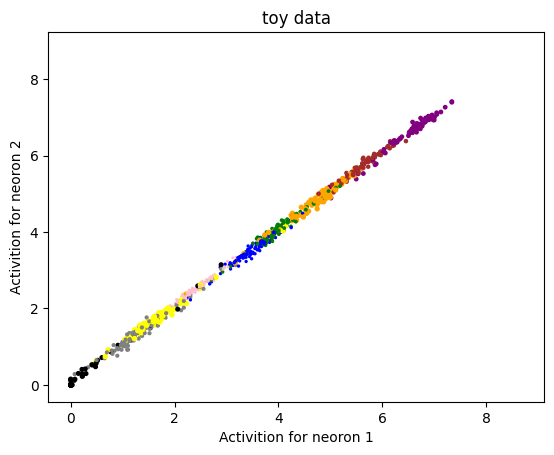

In [52]:
ins_indices = np.random.choice(x_train.shape[0], size=1000, replace=False)
ins = x_train[ins_indices]
labels = y_train[ins_indices]
outs = model2.predict(ins)

colors = {
    0: 'red',
    1: 'pink',
    2: 'blue',
    3: 'green',
    4: 'grey',
    5: 'brown',
    6: 'purple',
    7: 'black',
    8: 'orange',
    9: 'yellow',
}

%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(outs[:,0], outs[:,1], labels, c=[colors[x] for x in labels])
ax.set_xlabel('Activition for neoron 1')
ax.set_ylabel('Activition for neoron 2')
ax.set_title('toy data')
plt.show()